# 1. Introduction

## Introduction
This case study is aimed at solving real business problems using EDA. The aim is to develop a basic understanding of risk analytics in banking and financial services and to understand how data is used to minimise the risk of losing money while lending to customers.


## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.

When a person applies for a loan, there are two types of decisions that could be taken by the company:

1. Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:
    - Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
    - Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    - Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
2. Loan rejected: The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 

To develop your understanding of the domain, you are advised to independently research a little about risk analytics (understanding the types of variables and their significance should be enough).

# 2. Reading the data

### Initialise Jupyter

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Adjusting jupyter views
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

### Read the file

In [4]:
# Read csv file
df = pd.read_csv("loan.csv")

# 3. Data understanding

### Inspecting the data

In [5]:
# Number of columns and rows
df.shape

(39717, 111)

In [6]:
# Get column names along with their types
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [7]:
# Percentage of missing values in each column
df.isnull().sum() / len(df) * 100

id                                  0.000000
member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.191303
emp_length                          2.706650
home_ownership                      0.000000
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
loan_status                         0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.580507
purpose                             0.000000
title                               0.027696
zip_code  

### Identifying columns that need to be dropped

In [8]:
# Get columns that are >= 30% empty
empty_columns = df.isnull().sum() / len(df) * 100
empty_columns = empty_columns[ empty_columns.values >= 30 ]

In [9]:
empty_columns

desc                               32.580507
mths_since_last_delinq             64.662487
mths_since_last_record             92.985372
next_pymnt_d                       97.129693
mths_since_last_major_derog       100.000000
annual_inc_joint                  100.000000
dti_joint                         100.000000
verification_status_joint         100.000000
tot_coll_amt                      100.000000
tot_cur_bal                       100.000000
open_acc_6m                       100.000000
open_il_6m                        100.000000
open_il_12m                       100.000000
open_il_24m                       100.000000
mths_since_rcnt_il                100.000000
total_bal_il                      100.000000
il_util                           100.000000
open_rv_12m                       100.000000
open_rv_24m                       100.000000
max_bal_bc                        100.000000
all_util                          100.000000
total_rev_hi_lim                  100.000000
inq_fi    

In [10]:
# Total number of columns that are >= 30% empty
len(empty_columns)

58

### Identifying columns that can be imputed

In [11]:
# Get columns that have less than 1% null values
columns_to_impute = df.isnull().sum() / len(df) * 100
columns_to_impute = columns_to_impute[ (columns_to_impute < 1) & (columns_to_impute > 0) ]
columns_to_impute.sort_values(ascending = False)

last_pymnt_d                  0.178765
collections_12_mths_ex_med    0.140998
chargeoff_within_12_mths      0.140998
revol_util                    0.125891
tax_liens                     0.098195
title                         0.027696
last_credit_pull_d            0.005036
dtype: float64

There are 7 columns that have < 1% null values, these can be imputed.

### Identifying columns that need to be analysed while data cleaning

In [12]:
columns_to_analyse = df.isnull().sum() / len(df) * 100
columns_to_analyse = columns_to_analyse[ (columns_to_analyse < 30) & (columns_to_analyse > 1) ]
columns_to_analyse

emp_title               6.191303
emp_length              2.706650
pub_rec_bankruptcies    1.754916
dtype: float64

And there are 3 columns that have > 1% null values, we have to analyse the data in these columns to figure out what can be done with them. Are they related to any other variables? Can we drop them? Should we impute them?

# 4. Data Cleaning and Manipulation

### Dropping empty columns from dataset

In [13]:
clean_df = df
clean_df = df.drop(empty_columns.index, axis=1)
clean_df.shape

(39717, 53)

Total columns - Empty columns = 111 - 58 = 53 remaining columns

### Imputing empty columns

In [14]:
print(columns_to_impute.index)

Index(['title', 'revol_util', 'last_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'], dtype='object')


In [15]:
for index in columns_to_impute.index:
    print("For column: {}".format(index))
    print(clean_df[index].unique().shape)

For column: title
(19616,)
For column: revol_util
(1090,)
For column: last_pymnt_d
(102,)
For column: last_credit_pull_d
(107,)
For column: collections_12_mths_ex_med
(2,)
For column: chargeoff_within_12_mths
(2,)
For column: tax_liens
(2,)


---
Out of 7 columns identified earlier, imputing collections_12_mths_ex_med, chargeoff_within_12_mths and tax_liens is straightforward as there are only 2 possible values.

Please note that we're not dropping these columns for now, as we'll be dropping all the columns with only one unique value later in data cleaning step.

In [16]:
for column in ('collections_12_mths_ex_med', 'chargeoff_within_12_mths', 'tax_liens'):
    clean_df[column].fillna(clean_df[column].mean(), inplace=True)
    print(clean_df[column].unique().shape)

(1,)
(1,)
(1,)


___
Let's check last_pymnt_d and last_credit_pull_d columns now.

In [17]:
clean_df['last_pymnt_d'].value_counts()

May-16    1256
Mar-13    1026
Dec-14     945
May-13     907
Feb-13     869
Apr-13     851
Mar-12     844
Aug-12     832
Jan-14     832
Aug-14     832
Oct-12     826
Mar-14     824
Jul-14     820
Oct-14     808
Feb-14     792
Jan-13     784
Dec-13     780
Jun-14     778
Jul-13     776
Sep-12     761
Jul-12     741
Nov-12     740
May-12     736
Feb-12     735
Apr-12     734
Aug-13     727
Dec-12     707
Jun-12     702
Sep-14     693
Oct-13     692
Jun-13     691
Sep-13     684
May-14     682
Apr-14     674
Nov-13     671
Nov-14     589
Jan-12     546
Dec-11     544
Mar-11     488
Nov-11     454
Oct-11     453
Sep-11     450
Aug-11     428
Apr-11     420
Jul-11     394
May-11     386
Jun-11     376
Feb-11     337
Jan-15     332
Jan-11     266
Dec-10     253
Jul-15     250
Nov-15     227
Jun-15     220
Apr-16     220
Mar-16     216
Oct-10     216
Aug-15     210
Sep-15     202
Nov-10     195
Jul-10     188
Oct-15     186
Jan-16     183
Mar-15     182
Dec-15     176
Sep-10     176
Feb-16    

In [18]:
clean_df['last_credit_pull_d'].value_counts()

May-16    10308
Apr-16     2547
Mar-16     1123
Feb-13      843
Feb-16      736
Jan-16      657
Dec-15      647
Mar-13      577
Mar-14      564
Dec-14      562
Jul-14      555
Sep-14      546
Jul-15      535
Feb-14      531
Nov-15      529
Oct-14      529
Aug-14      522
Jan-14      516
Sep-15      512
Oct-15      502
Nov-14      497
Apr-14      494
Nov-13      473
May-14      473
Jun-14      466
May-13      448
Jan-15      440
Apr-13      425
May-15      423
Dec-13      422
Aug-15      422
Oct-13      416
Nov-12      404
Jul-13      396
Sep-12      391
Sep-13      390
Apr-15      388
Aug-12      377
Jun-15      375
Dec-12      374
Mar-15      371
Aug-13      370
Jun-13      370
Feb-12      368
Feb-15      358
Mar-12      338
Oct-12      332
May-12      324
Apr-12      308
Jun-12      308
Jul-12      297
Jan-12      258
Mar-11      257
Aug-11      254
Dec-11      245
Nov-11      201
May-11      193
Jun-11      165
Sep-11      157
Jul-11      156
Feb-11      151
Oct-11      148
Apr-11  

Both of these columns contain dates, so we can't put an average or a mode value in them.

In [19]:
# Are there any rows that have both of these fields empty?
clean_df[ clean_df['last_pymnt_d'].isna() & clean_df['last_credit_pull_d'].isna() ].shape

(0, 53)

There are 0 rows that have both last_pymnt_d and last_credit_pull_d as empty values.

Since these columns contain dates and there aren't any other variables that might help us in deriving values for these columns and the number of rows with null values for these columns is low, it is fine to drop such rows.

In [20]:
for column in ('last_pymnt_d', 'last_credit_pull_d'):
    clean_df = clean_df.dropna(subset=[ column ])

---
Now lets look at revol_util column.

In [21]:
# Check unique value counts for revol_util
clean_df['revol_util'].value_counts()

0%        975
0.20%      62
63%        62
40.70%     58
66.70%     58
         ... 
25.74%      1
0.83%       1
47.36%      1
10.61%      1
7.28%       1
Name: revol_util, Length: 1089, dtype: int64

In [22]:
# Replace % from value and convert to float64 type
clean_df['revol_util'] = clean_df['revol_util'].apply(lambda x: str(x).replace("%", ""))
clean_df['revol_util'] = clean_df['revol_util'].astype('float64')

In [23]:
# look for appropriate value for imputation
clean_df['revol_util'].describe()

count    39598.000000
mean        48.831249
std         28.332150
min          0.000000
25%         25.400000
50%         49.300000
75%         72.400000
max         99.900000
Name: revol_util, dtype: float64

In [24]:
# Get total null values for this column
clean_df['revol_util'].isna().sum()

46

In [25]:
# fill na values with mean
clean_df['revol_util'].fillna(clean_df['revol_util'].mean(), inplace=True)

In [26]:
# verify the null values have been filled
clean_df['revol_util'].isna().sum()

0

In [27]:
# find out percentage of null values now
clean_df.isnull().sum() / len(df) * 100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.168643
emp_length                    2.694060
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

---
Lastly lets check values in title column.

In [28]:
clean_df['title'].unique().shape

(19585,)

In [29]:
clean_df['title'].info()

<class 'pandas.core.series.Series'>
Int64Index: 39644 entries, 0 to 39716
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
39633 non-null  object
dtypes: object(1)
memory usage: 619.4+ KB


title is a string type with 19616 unique values. We can't impute it with an average or mode value. Let's put an NA in it for now.

In [30]:
# fill null values in title with NA
clean_df['title'].fillna('NA', inplace=True)

In [31]:
# verify no more null values
clean_df['title'].isna().sum()

0

### Analysing columns with >1% empty values

In [32]:
columns_to_analyse

emp_title               6.191303
emp_length              2.706650
pub_rec_bankruptcies    1.754916
dtype: float64

Let's looks at __emp_title__ first.

In [33]:
clean_df['emp_title'].describe()

count       37194
unique      28769
top       US Army
freq          133
Name: emp_title, dtype: object

In [34]:
clean_df['emp_title'].unique().shape

(28770,)

With so many string values, it doesn't look like we're going to find any insight out of it. Dropping this column seems to be a good approach.

In [35]:
# make a note of number of columns before dropping emp_title
clean_df.shape

(39644, 53)

In [36]:
# drop emp_title column from the dataset
clean_df = clean_df.drop('emp_title', axis=1)

In [37]:
# verify only one column was dropped
clean_df.shape

(39644, 52)

---
Now for __pub_rec_bankruptcies__

In [38]:
# how many unique values are there for pub_rec_bankruptcies
clean_df['pub_rec_bankruptcies'].unique().shape

(4,)

In [39]:
# get the value counts for pub_rec_bankruptcies
clean_df['pub_rec_bankruptcies'].value_counts()

0.0    37273
1.0     1668
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [40]:
# get the total number of null values for pub_rec_bankruptcies
clean_df['pub_rec_bankruptcies'].isnull().sum()

696

In [41]:
# check the data type of this column
clean_df['pub_rec_bankruptcies'].info()

<class 'pandas.core.series.Series'>
Int64Index: 39644 entries, 0 to 39716
Series name: pub_rec_bankruptcies
Non-Null Count  Dtype  
--------------  -----  
38948 non-null  float64
dtypes: float64(1)
memory usage: 619.4 KB


In [42]:
# since it is a float type, we can do a describe to find mean, Q1, Q3 values.
clean_df['pub_rec_bankruptcies'].describe()

count    38948.000000
mean         0.043186
std          0.204160
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

Since 75% of entries are at 0.00, imputing empty values for this column to 0.00 seems fine. 

In [43]:
# fill na with 0.000 (min)
clean_df['pub_rec_bankruptcies'].fillna(clean_df['pub_rec_bankruptcies'].min(), inplace=True)

In [44]:
# verify null values have been filled
clean_df['pub_rec_bankruptcies'].unique().shape

(3,)

---
Now lets check __emp_length__.

In [45]:
clean_df['emp_length'].value_counts()

10+ years    8870
< 1 year     4574
2 years      4382
3 years      4088
4 years      3428
5 years      3272
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: emp_length, dtype: int64

In [46]:
clean_df['emp_length'].unique().shape

(12,)

There aren't any other fields like age or dob, we can't find a valid value for emp_length. Removing rows that have null emp_length seems to be appropriate as we don't want such records to distort our analysis.

In [47]:
# make a note of number of rows before dropping emp_length
clean_df.shape

(39644, 52)

In [48]:
clean_df = clean_df.dropna(subset=[ 'emp_length' ])

In [49]:
clean_df.shape

(38574, 52)

Total rows - Rows with na emp_length = 39717 - 38642 = 1075 rows deleted

---

There are no null values remaining in the dataset.

In [50]:
clean_df.isnull().sum() / len(clean_df) * 100

id                            0.0
member_id                     0.0
loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
pymnt_plan                    0.0
url                           0.0
purpose                       0.0
title                         0.0
zip_code                      0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util    

### Dropping columns with only one distinct value in the entire dataset

Finding out columns that have only one unique value. These can be dropped as they are not varying in the dataset and won't affect the analysis.

In [51]:
for column in clean_df.columns:
    if len(clean_df[column].unique()) == 1:
        print("Removing column {} as only one unique value exists.".format(column))
        clean_df.drop(column, inplace=True, axis=1)

Removing column pymnt_plan as only one unique value exists.
Removing column initial_list_status as only one unique value exists.
Removing column collections_12_mths_ex_med as only one unique value exists.
Removing column policy_code as only one unique value exists.
Removing column application_type as only one unique value exists.
Removing column acc_now_delinq as only one unique value exists.
Removing column chargeoff_within_12_mths as only one unique value exists.
Removing column delinq_amnt as only one unique value exists.
Removing column tax_liens as only one unique value exists.


### Dropping rows that have Current loan_status as they are indeterministic for identifying default behabiour

In [52]:
clean_df['loan_status'].value_counts()

Fully Paid     32144
Charged Off     5332
Current         1098
Name: loan_status, dtype: int64

In [53]:
clean_df = clean_df [ clean_df['loan_status'] != 'Current' ]

### Creating a new column is_defaulter from loan_status

In [54]:
clean_df['is_defaulter'] = clean_df['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)
clean_df['is_defaulter'].value_counts()

0    32144
1     5332
Name: is_defaulter, dtype: int64

### Creating a new column is_verified from verification_status

In [55]:
clean_df['is_verified'] = clean_df['verification_status'].apply(lambda x: 0 if x == 'Not Verified' else 1)
clean_df['is_verified'].value_counts()

1    21234
0    16242
Name: is_verified, dtype: int64

### Creating a new column grade_value from subgrade

In [56]:
# Create a grade map - key as subgrade, value as int
# A1 = 1, A2 = 2, A3 = 3, ... , G5 = 35
grade_map = {}
value = 1
for grade in 'ABCDEFG':
    for i in range(1, 6):
        grade_map["{}{}".format(grade, i)] = value
        value += 1

# Create a new column with grade values
clean_df['grade_value'] = clean_df['sub_grade'].apply(lambda x: grade_map.get(x))
clean_df[['grade', 'sub_grade', 'grade_value']]

grade sub_grade  grade_value
0         B        B2            7
1         C        C4           14
2         C        C5           15
3         C        C1           11
5         A        A4            4
...     ...       ...          ...
39712     A        A4            4
39713     C        C1           11
39714     A        A4            4
39715     A        A2            2
39716     E        E2           22

[37476 rows x 3 columns]

### Removing outliers from funded_amnt

In [57]:
clean_df['funded_amnt'].describe()

count    37476.000000
mean     10857.789652
std       7094.352576
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [58]:
np.quantile(clean_df['funded_amnt'], 0.95)

25000.0

In [59]:
clean_df[ clean_df['funded_amnt'] <= 25000.0 ].shape[0] * 100 / clean_df.shape[0]

96.67520546483082

In [60]:
clean_df = clean_df[ clean_df['funded_amnt'] <= 25000.0 ]

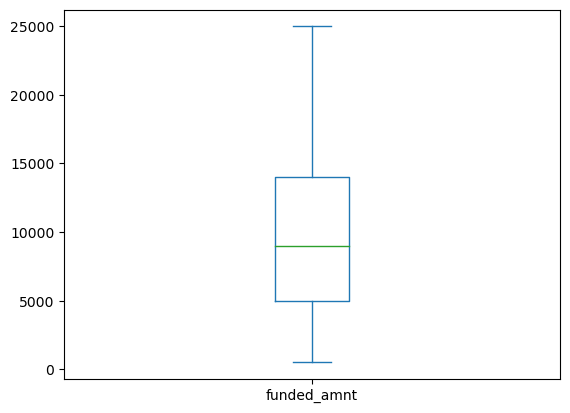

In [61]:
clean_df['funded_amnt'].plot.box()
plt.show()

### Removing outliers from annual_inc

In [62]:
clean_df['annual_inc'].describe()

count    3.623000e+04
mean     6.771059e+04
std      6.353626e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.800000e+04
75%      8.000000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [63]:
np.quantile(clean_df['annual_inc'], 0.95)

138000.0

In [64]:
clean_df = clean_df[ clean_df['annual_inc'] < 125000 ]

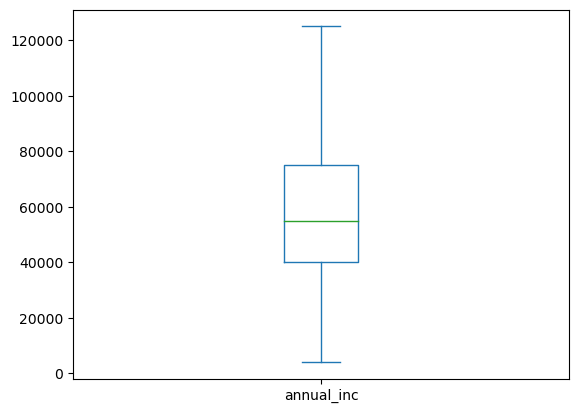

In [65]:
clean_df['annual_inc'].plot.box()
plt.show()

---
Looking at the data, there are some columns that need to be formatted appropriately.
- __term__: remove months and convert to int
- __int_rate__: remove % and convert to float
- Date fields need to be converted to datetime objects:
    - __issue_d__
    - __earliest_cr_line__
    - __last_pymnt_d__
    - __last_credit_pull_d__


---
__term__: remove months and convert to int

In [66]:
clean_df['term'] = clean_df['term'].apply(lambda x: int(x.replace(' months', '')))

In [67]:
clean_df['term'].info()

<class 'pandas.core.series.Series'>
Int64Index: 33659 entries, 0 to 39716
Series name: term
Non-Null Count  Dtype
--------------  -----
33659 non-null  int64
dtypes: int64(1)
memory usage: 525.9 KB


---
__int_rate__: remove % and convert to float

In [68]:
clean_df['int_rate'] = clean_df['int_rate'].apply(lambda x: float(str(x).replace('%', '')))

In [69]:
clean_df['int_rate'].info()

<class 'pandas.core.series.Series'>
Int64Index: 33659 entries, 0 to 39716
Series name: int_rate
Non-Null Count  Dtype  
--------------  -----  
33659 non-null  float64
dtypes: float64(1)
memory usage: 525.9 KB


---
__Date__ fields need to be converted to datetime objects:
 - __issue_d__
 - __earliest_cr_line__
 - __last_pymnt_d__
 - __last_credit_pull_d__

In [70]:
for column in ('issue_d', 'earliest_cr_line', 'last_pymnt_d', 'last_credit_pull_d'):
    clean_df[column] = pd.to_datetime(clean_df[column], format='%b-%y')
    clean_df[column + '_month'] = clean_df[column].dt.month
    clean_df[column + '_year'] = clean_df[column].dt.year

---
### Creating a new column int_rate_bin for binning interest rates

In [71]:
import math   
clean_df['int_rate_bin'] = clean_df['int_rate'].apply(lambda x: math.floor(x))

---
### Removing outliers from int_rate

In [72]:
clean_df['int_rate'].value_counts()

10.99    798
7.51     714
11.49    705
7.88     658
13.49    655
7.49     566
9.99     519
5.42     492
7.90     474
11.71    468
11.99    412
10.37    407
12.69    388
6.03     384
8.49     376
5.79     365
7.29     359
11.86    354
10.65    352
6.62     341
12.99    340
9.63     338
12.42    337
8.90     325
10.59    320
7.14     311
5.99     306
12.53    303
9.91     295
6.99     294
11.11    291
6.54     281
14.27    280
10.74    277
8.94     274
13.61    271
6.91     269
7.66     258
13.98    252
16.77    243
13.23    242
10.36    233
10.00    230
11.12    224
6.17     221
12.68    221
10.75    217
15.99    217
11.36    217
10.38    198
13.99    198
10.25    196
11.83    195
10.62    195
14.96    194
13.06    189
12.18    187
11.14    186
6.92     183
16.49    182
8.00     180
15.95    180
9.32     175
15.65    174
14.65    173
8.59     172
15.58    171
16.32    170
15.27    170
15.21    168
9.88     167
13.11    167
12.73    167
9.62     164
15.23    164
12.61    162
11.48    162

In [73]:
clean_df['int_rate'].describe()

count    33659.000000
mean        11.807549
std          3.588693
min          5.420000
25%          8.900000
50%         11.710000
75%         14.260000
max         24.400000
Name: int_rate, dtype: float64

In [74]:
clean_df['int_rate'].quantile(0.95)

17.99

In [75]:
clean_df = clean_df[ clean_df['int_rate'] < np.quantile(clean_df['int_rate'], 0.98) ]

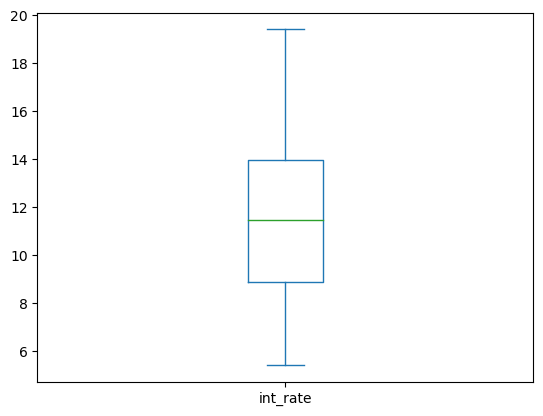

In [76]:
clean_df['int_rate'].plot.box()
plt.show()

---
### Check if any outliers in dti

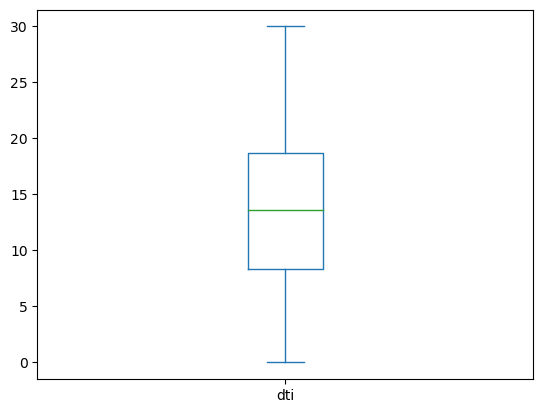

In [77]:
clean_df['dti'].plot.box()
plt.show()

# 5. Data analysis

## Univariate Analysis

#### Term
The number of payments on the loan. Values are in months and can be either 36 or 60. Let's look at the contribution of each term.

In [78]:
# Creating a function to plot piecharts
def plot_pieplot(data, column):
    counts = data[column].value_counts()
    total = counts.values.sum()
    def fmt(x):
        return '{:.1f}%'.format(x, total * x / 100)

    counts.plot.pie()
    plt.pie(counts.values, labels=counts.index, autopct=fmt)
    plt.show()

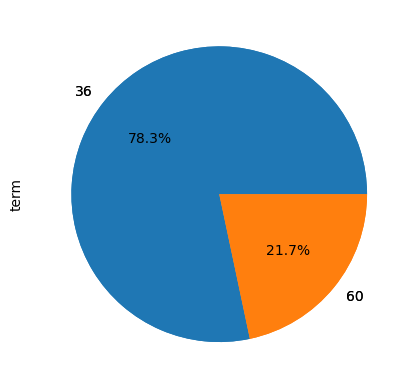

In [79]:
plot_pieplot(clean_df, 'term')

#### Insight:
- 78.3% of loan are for 36 months term.
- Only 21.7% opt for 60 months term.

---
#### Grade
 LC assigned loan grade

In [80]:
# Creating a method for countplot with counts in descreasing order
def plot_countplot(data, column, rotate_x=0):
    sns.countplot(x = column,
                  data = clean_df,
                  order = clean_df[column].value_counts().index)
    if rotate_x:
        plt.xticks(rotation=90)
    plt.show()

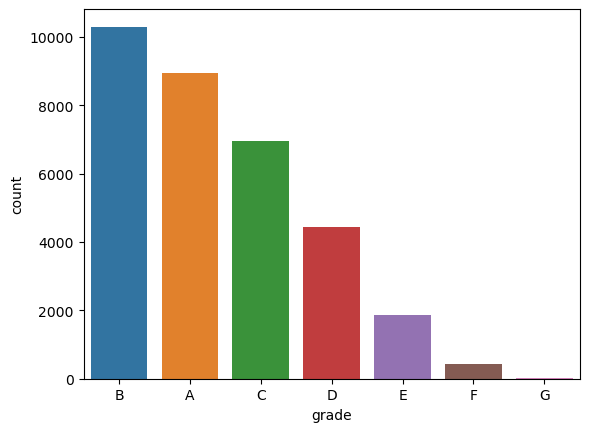

In [81]:
plot_countplot(clean_df, 'grade')

#### Insight:
- The most frequently occuring grade is B. After that, the counts are decreasing in linear fashion.

---
#### emp_length
Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

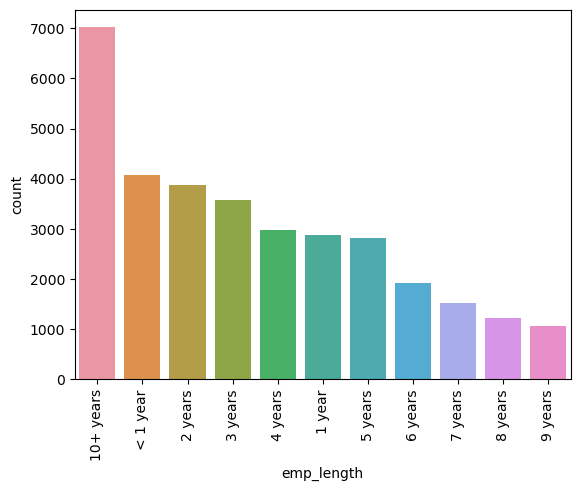

In [82]:
plot_countplot(clean_df, 'emp_length', rotate_x=1)

#### Insight:
- Most of the applicants have been working for 10+ years.

---
#### home_ownership
The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

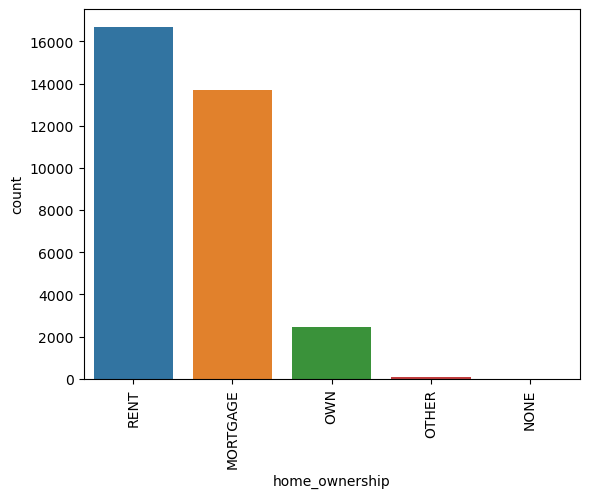

In [83]:
plot_countplot(clean_df, 'home_ownership', rotate_x=1)

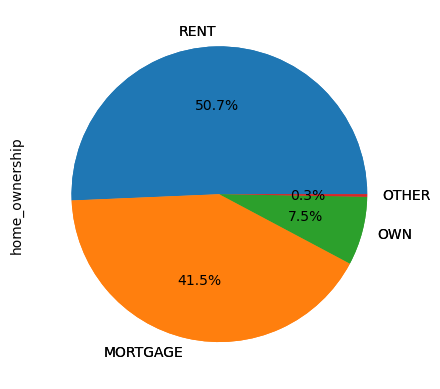

In [84]:
plot_pieplot(clean_df[ clean_df['home_ownership'] != 'NONE' ], 'home_ownership')

#### Insight:
- Most of the applicants don't own their homes, only 7.5% people do.

---
#### verification_status
Indicates if income was verified by LC, not verified, or if the income source was verified

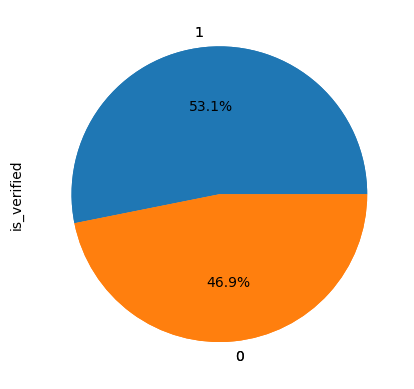

In [85]:
plot_pieplot(clean_df, 'is_verified')

#### Insight:
- There are 46.9% applicants whose incomes were not verified at all.

---
#### loan_status
Current status of the loan, excludes people currently paying off the loans.

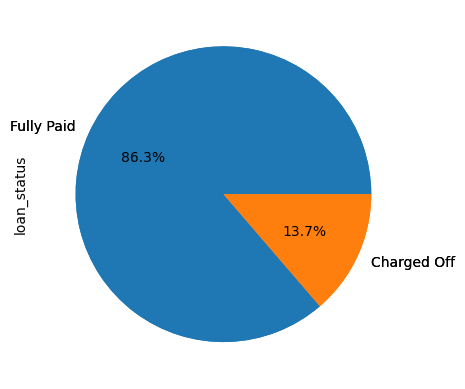

In [86]:
plot_pieplot(clean_df, 'loan_status')

#### Insight:
- 13.7% people have defaulted on their loans.

---
#### purpose
A category provided by the borrower for the loan request.

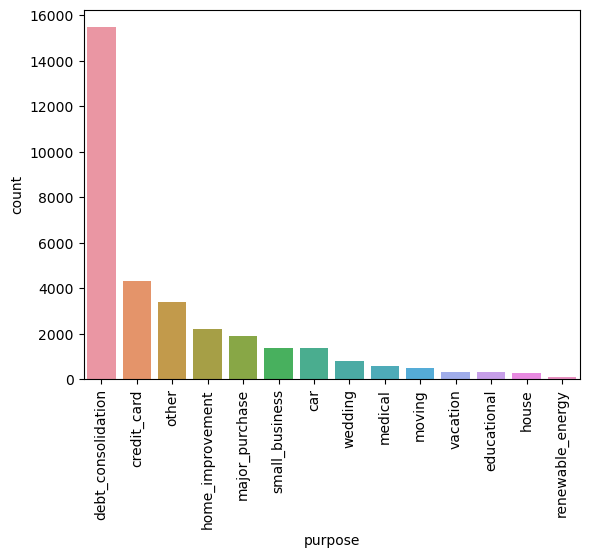

In [87]:
plot_countplot(clean_df, 'purpose', rotate_x=1)

#### Insight:
- Most of applicants have taken the loan for debt consolidation and paying off their credit card debt.

---
#### funded_amnt
The total amount committed to that loan at that point in time.

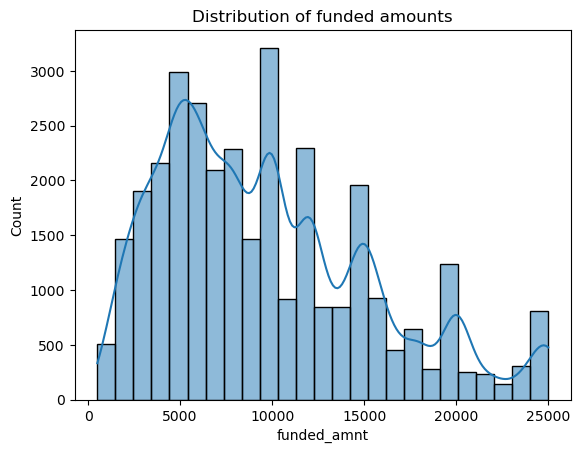

In [88]:
plt.title("Distribution of funded amounts")
sns.histplot(data=clean_df['funded_amnt'], bins=25, kde=True)
plt.show()

#### Insight:
- Most of the loan applications are for amounts between 5,000 and 10,000. 
- There are spikes at round figures of 5k, 10k, 12k, 15k and 20k.

---
#### annual_income



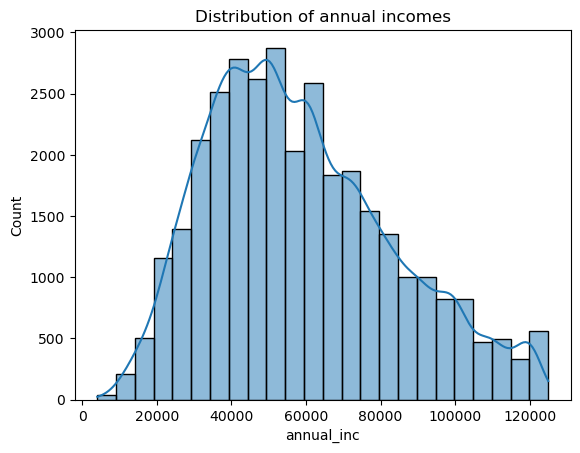

In [89]:
plt.title("Distribution of annual incomes")
sns.histplot(data=clean_df['annual_inc'], bins=24, kde=True)
plt.show()

#### Inight:
The annual income of most of the applicants lie between 40k and 60k.

---
#### loan issued date

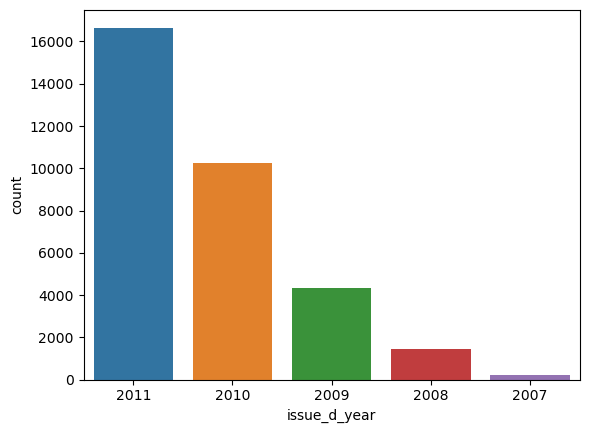

In [90]:
plot_countplot(clean_df, 'issue_d_year')

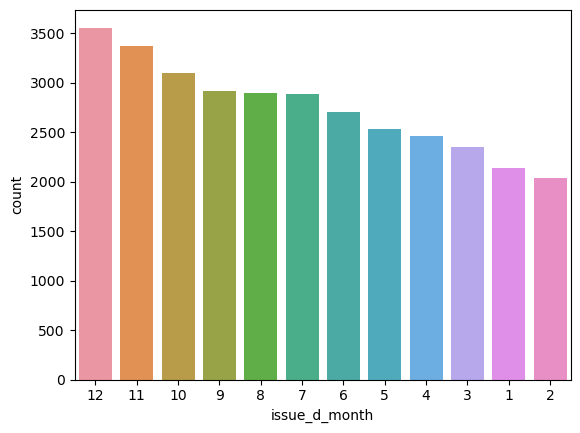

In [91]:
plot_countplot(clean_df, 'issue_d_month')

#### Insight:
- Most of the loans issued were in the year 2011.
- Most of the loans were taken in the month of December. Checking this with loan purposes, it seems people tend to take a lot of loans in the month of December and then go for debt consolidations through more loans. This may be because there are Christmas holidays in December and people share gifts across family and friends.
- Another way to look at this data is that debt keeps on increasing over the months and so the increase in number of loan applications with increase in months for debt consolidations.

---
### Segmented Univariate analysis

#### What is the effect of home ownership on funded amount? How does it differ for fully paid and defaulting users?

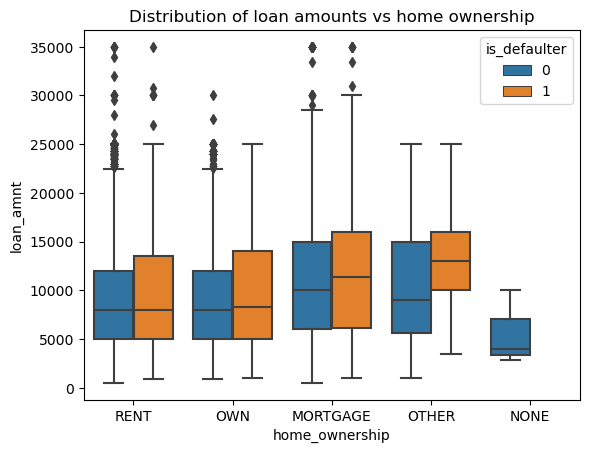

In [92]:
plt.title("Distribution of loan amounts vs home ownership")
sns.boxplot(data=clean_df, x='home_ownership', y='loan_amnt', hue='is_defaulter', orient='v')
plt.show()

#### Insight
- People with home ownership mentioned as "MORTGAGE" and "OTHER", on an average, tend to go for loan amount larger than people living in rented or own homes.

---
#### Effect of grade on loan amounts

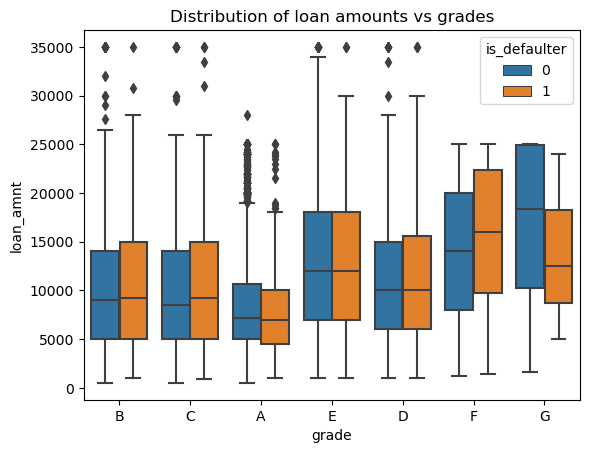

In [93]:
plt.title("Distribution of loan amounts vs grades")
sns.boxplot(data=clean_df, y='loan_amnt', x='grade', hue='is_defaulter')
plt.show()

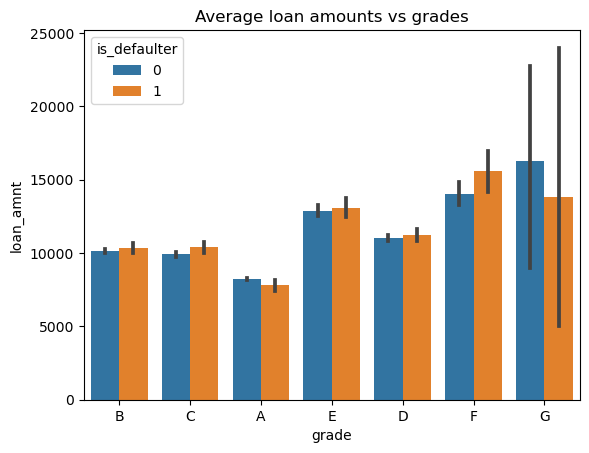

In [94]:
plt.title("Average loan amounts vs grades")
sns.barplot(data=clean_df, y='loan_amnt', x='grade', hue='is_defaulter', estimator=np.mean)
plt.show()

#### Insight
- People with poorer grades go for larger loan amounts.
- Grade F people take larger loan amounts and tend to default more.
- With decreasing grades, the variability of data also increases. This suggests increasing errors in reported data measurement.
- There is huge variance in recording grade G data.

#### Interest rate vs grades by defaulters and non-defaulters

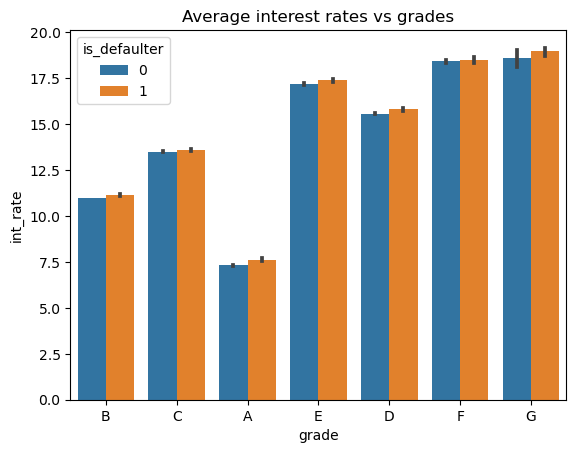

In [95]:
plt.title("Average interest rates vs grades")
sns.barplot(data=clean_df, y='int_rate', x='grade', hue='is_defaulter', estimator=np.mean)
plt.show()

#### Insight:
- With poorer grades, interest rates increase.

---
#### Proportion of defaulters wrt interest rates
Let's check the counts of defaulters and non-defaulters for each interest rate bin

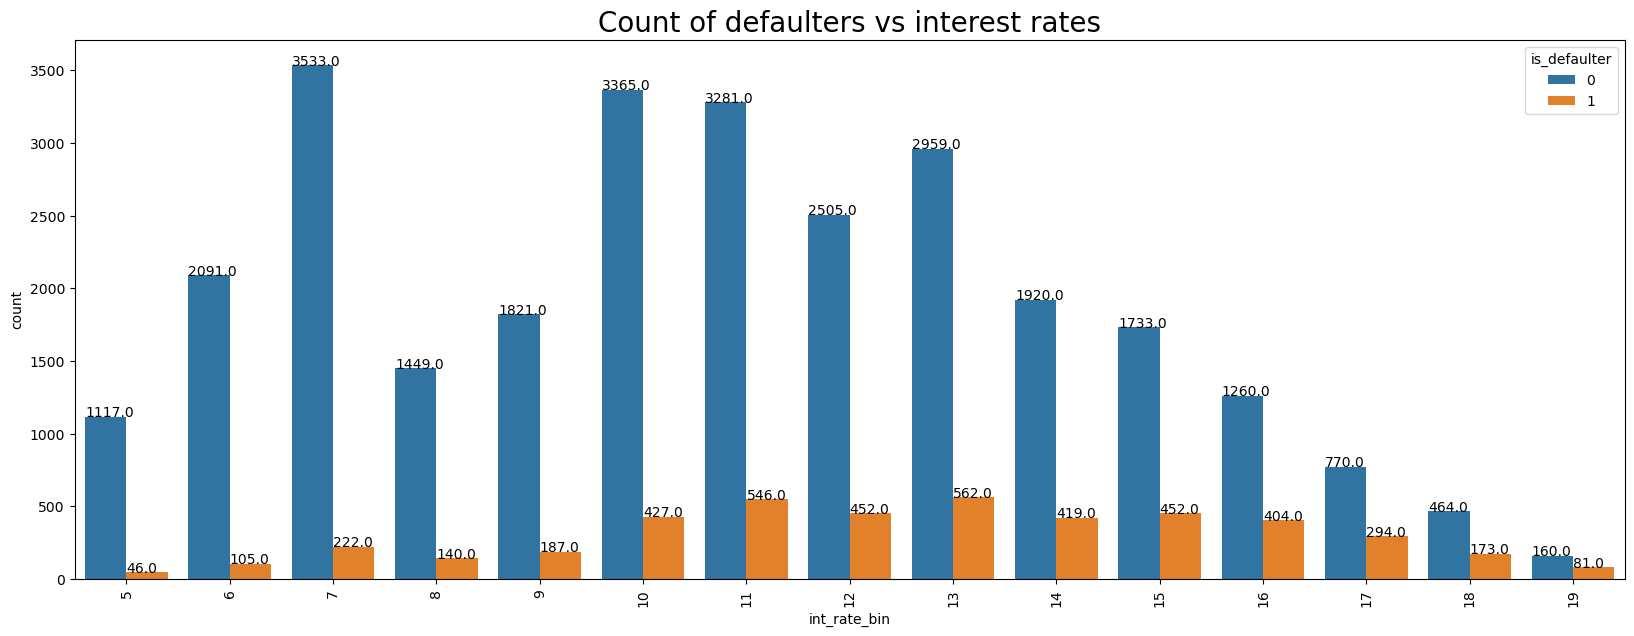

In [96]:
plt.figure(figsize=(20,7))
plt.title("Count of defaulters vs interest rates", fontsize=20)
ax = sns.countplot(x = 'int_rate_bin',
              data = clean_df,
              hue='is_defaulter')

for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x(), p.get_height()))

plt.xticks(rotation=90)
plt.show()

This doesn't give much insights. Let's try to normalize this and plot a stacked bar chart.

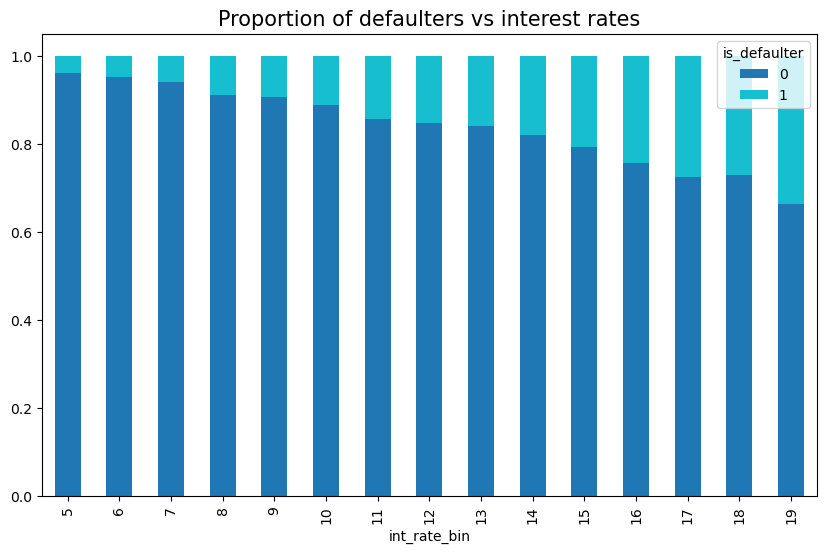

In [97]:
cross_tab_df = pd.crosstab(index=clean_df['int_rate_bin'],
                           columns=clean_df['is_defaulter'],
                           normalize="index")
cross_tab_df.plot(kind='bar', 
                  stacked=True, 
                  colormap='tab10', 
                  figsize=(10, 6))
plt.title("Proportion of defaulters vs interest rates", fontsize=15)
plt.show()

#### Insight
- The proportion of defaulters increase with increase in interest rates.

#### Annual incomes vs grades by defaulters and non-defaulters

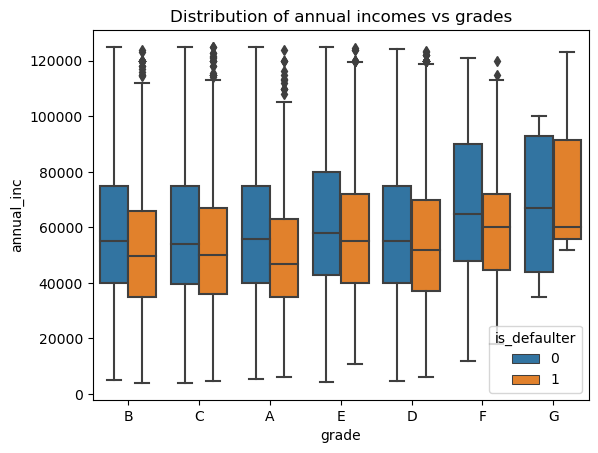

In [98]:
plt.title("Distribution of annual incomes vs grades")
sns.boxplot(data=clean_df, y='annual_inc', x='grade', hue='is_defaulter')
plt.show()

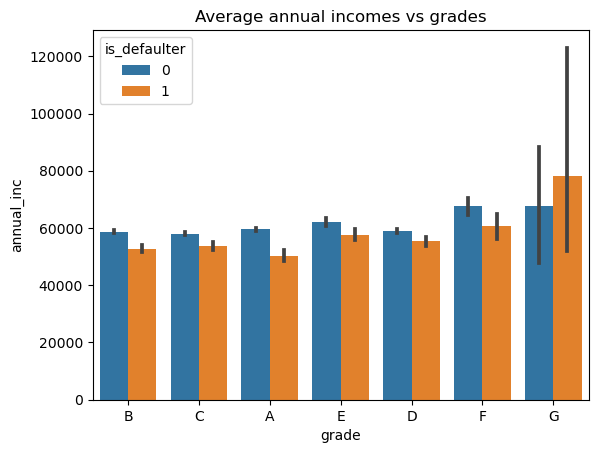

In [99]:
plt.title("Average annual incomes vs grades")
sns.barplot(data=clean_df, y='annual_inc', x='grade', hue='is_defaulter', estimator=np.mean)
plt.show()

#### Insight
- The average annual income of defaulters is lower than that of non-defaulters across different grades.
- People with annual income lower than the average annual income of non-defaulters are more likely to default.

#### Funded amount vs purpose by defaulters and non-defaulters

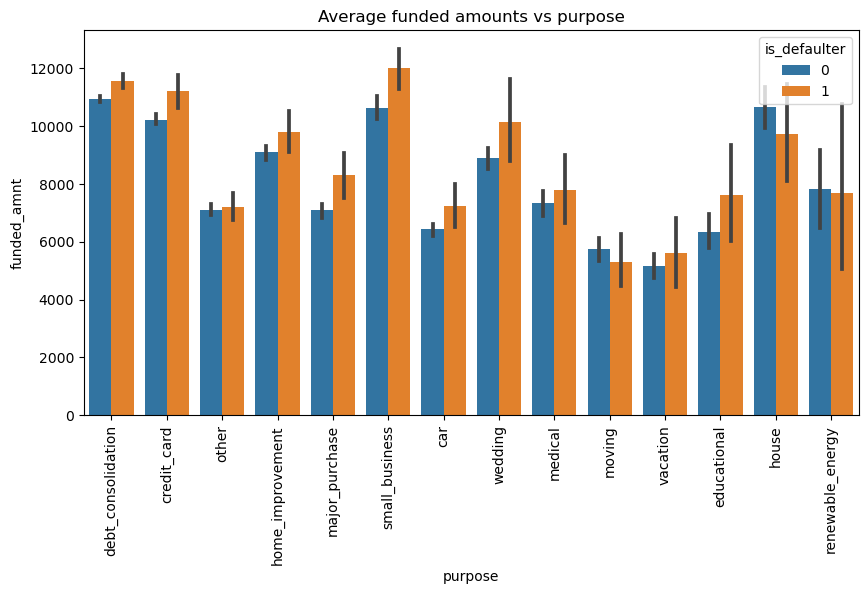

In [100]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=clean_df, y='funded_amnt', x='purpose', hue='is_defaulter',
                 order=clean_df.purpose.value_counts().index,
                 estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Average funded amounts vs purpose")
plt.legend(title='is_defaulter', loc='upper right')
plt.show()

#### Insight
- Across all purposes (except house, moving and renewable_enery), the average funded amount is larger for defaulters compared to non-defaulters.

#### Loan amount vs purpose by defaulters and non-defaulters

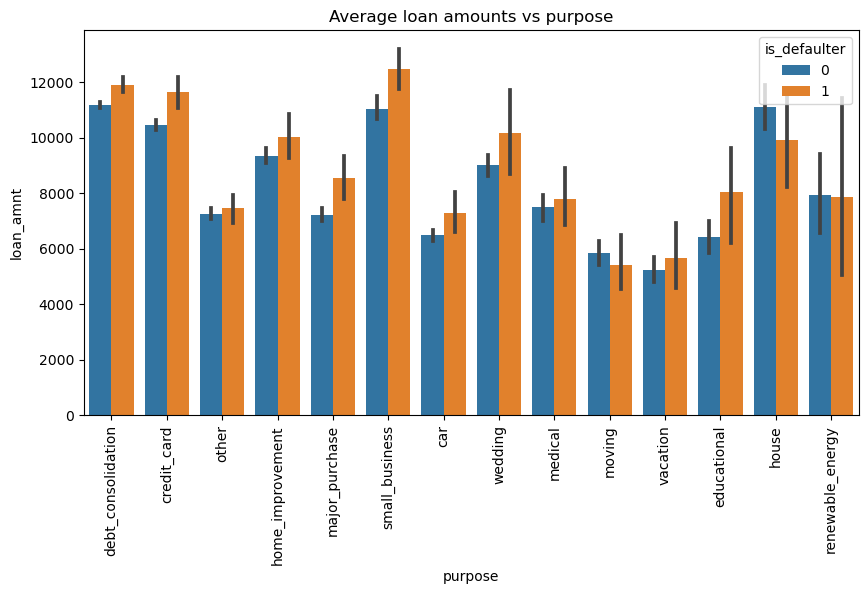

In [101]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=clean_df, y='loan_amnt', x='purpose', hue='is_defaulter',
                 order=clean_df.purpose.value_counts().index,
                 estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Average loan amounts vs purpose")
plt.legend(title='is_defaulter', loc='upper right')
plt.show()

#### Insight
- Across all purposes (except house, moving and renewable_enery), the average loan amount is larger for defaulters compared to non-defaulters.

#### Average dti vs purpose by defaulers and non-defaulters

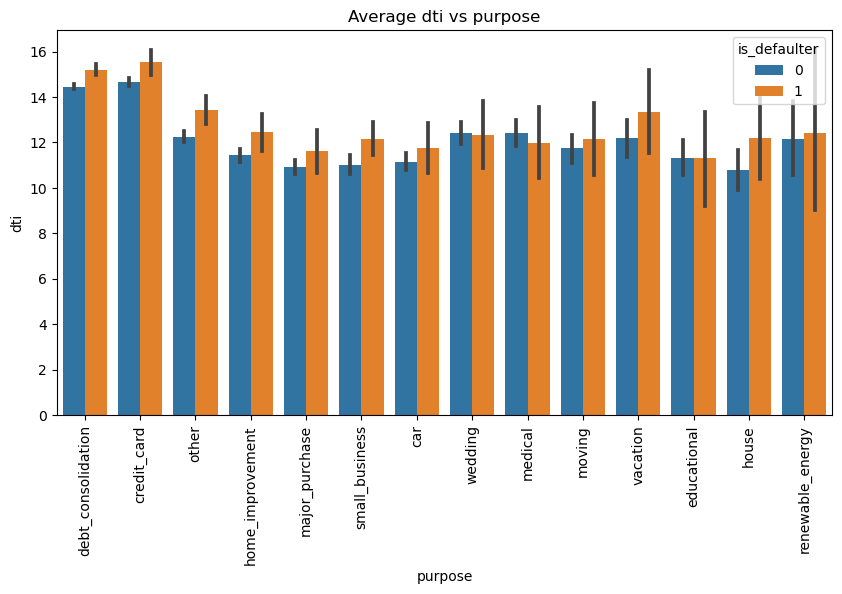

In [102]:
plt.figure(figsize=(10,5))
ax = sns.barplot(data=clean_df, y='dti', x='purpose', hue='is_defaulter',
                 order=clean_df.purpose.value_counts().index,
                 estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Average dti vs purpose")
plt.legend(title='is_defaulter', loc='upper right')
plt.show()

#### Insight:
- The average dti for defaulters is higher than non-defaulters across all purposes, except wedding and medical.
- If the gap in dti for an applicant and the average dti for non-defaulters for a certain category increases, the chances of default by that applicant increases.

#### Average dti vs home ownership by defaulers and non-defaulters

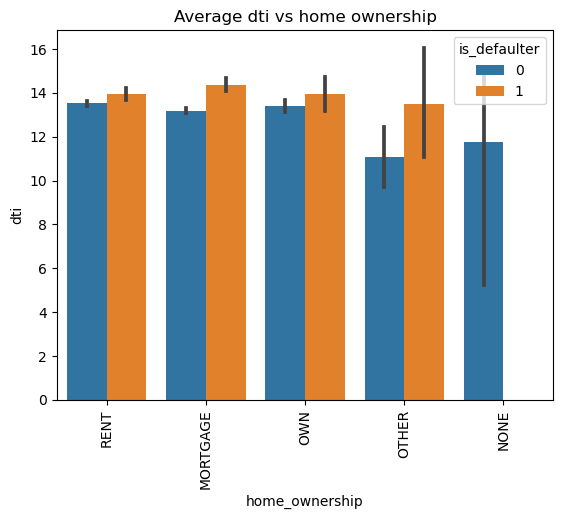

In [103]:
ax = sns.barplot(data=clean_df, y='dti', x='home_ownership', hue='is_defaulter',
                 order=clean_df.home_ownership.value_counts().index,
                 estimator=np.mean)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.title("Average dti vs home ownership")
plt.legend(title='is_defaulter', loc='upper right')
plt.show()

#### Insight:
- The average dti for defaulters is higher than non-defaulters across all types of home ownerships.
- If the gap in dti for an applicant and the average dti for non-defaulters for any type of home ownership increases, the chances of default by that applicant increases.

### Bivariate analysis

#### Let's try to find correlation between numerical variables.

In [104]:
# Numerical variables to find out correlation
corr_cols = [ "funded_amnt", "installment", "int_rate", "grade_value", "annual_inc", "dti", "delinq_2yrs", "pub_rec" ]

In [105]:
# Creating a dataframe of numerical variables for defaulters
def_corr_df = clean_df[ clean_df["is_defaulter"] == 1 ]
def_corr_df = def_corr_df[corr_cols]
def_corr_df

funded_amnt  installment  int_rate  grade_value  annual_inc    dti  delinq_2yrs  pub_rec
1             2500        59.83     15.27           14     30000.0   1.00            0        0
9             5375       121.45     12.69           10     15000.0  18.08            0        0
12            9000       305.38     13.49           11     30000.0  10.08            0        0
14           10000       325.74     10.65            7    100000.0   7.06            0        0
21           21000       701.73     12.42            9    105000.0  13.22            0        0
...            ...          ...       ...          ...         ...    ...          ...      ...
39653        20000       642.02      9.64            9     96000.0   2.86            0        0
39666        15450       507.46     11.22           14     40000.0  13.50            0        1
39667         2500        84.00     12.80           19     32000.0  20.00            0        0
39668         2500        80.26      9.64            9     75000.0  20.00            0        0
39678         1000        32.55     10.59           12     33990.0  14.47            0        0

[4510 rows x 8 columns]

In [106]:
# create a dataframe of numerical variables for non-defaulters
nondef_corr_df = clean_df[ clean_df["is_defaulter"] == 0 ]
nondef_corr_df = nondef_corr_df[corr_cols]
nondef_corr_df

funded_amnt  installment  int_rate  grade_value  annual_inc    dti  delinq_2yrs  pub_rec
0             5000       162.87     10.65            7     24000.0  27.65            0        0
2             2400        84.33     15.96           15     12252.0   8.72            0        0
3            10000       339.31     13.49           11     49200.0  20.00            0        0
5             5000       156.46      7.90            4     36000.0  11.20            0        0
6             7000       170.08     15.96           15     47004.0  23.51            0        0
...            ...          ...       ...          ...         ...    ...          ...      ...
39711         5000       158.30      8.70            6     75000.0  15.55            0        0
39712         2500        78.42      8.07            4    110000.0  11.33            0        0
39713         8500       275.38     10.28           11     18000.0   6.40            1        0
39714         5000       156.84      8.07            4    100000.0   2.30            0        0
39716         7500       255.43     13.75           22     22000.0  14.29            1        0

[28428 rows x 8 columns]

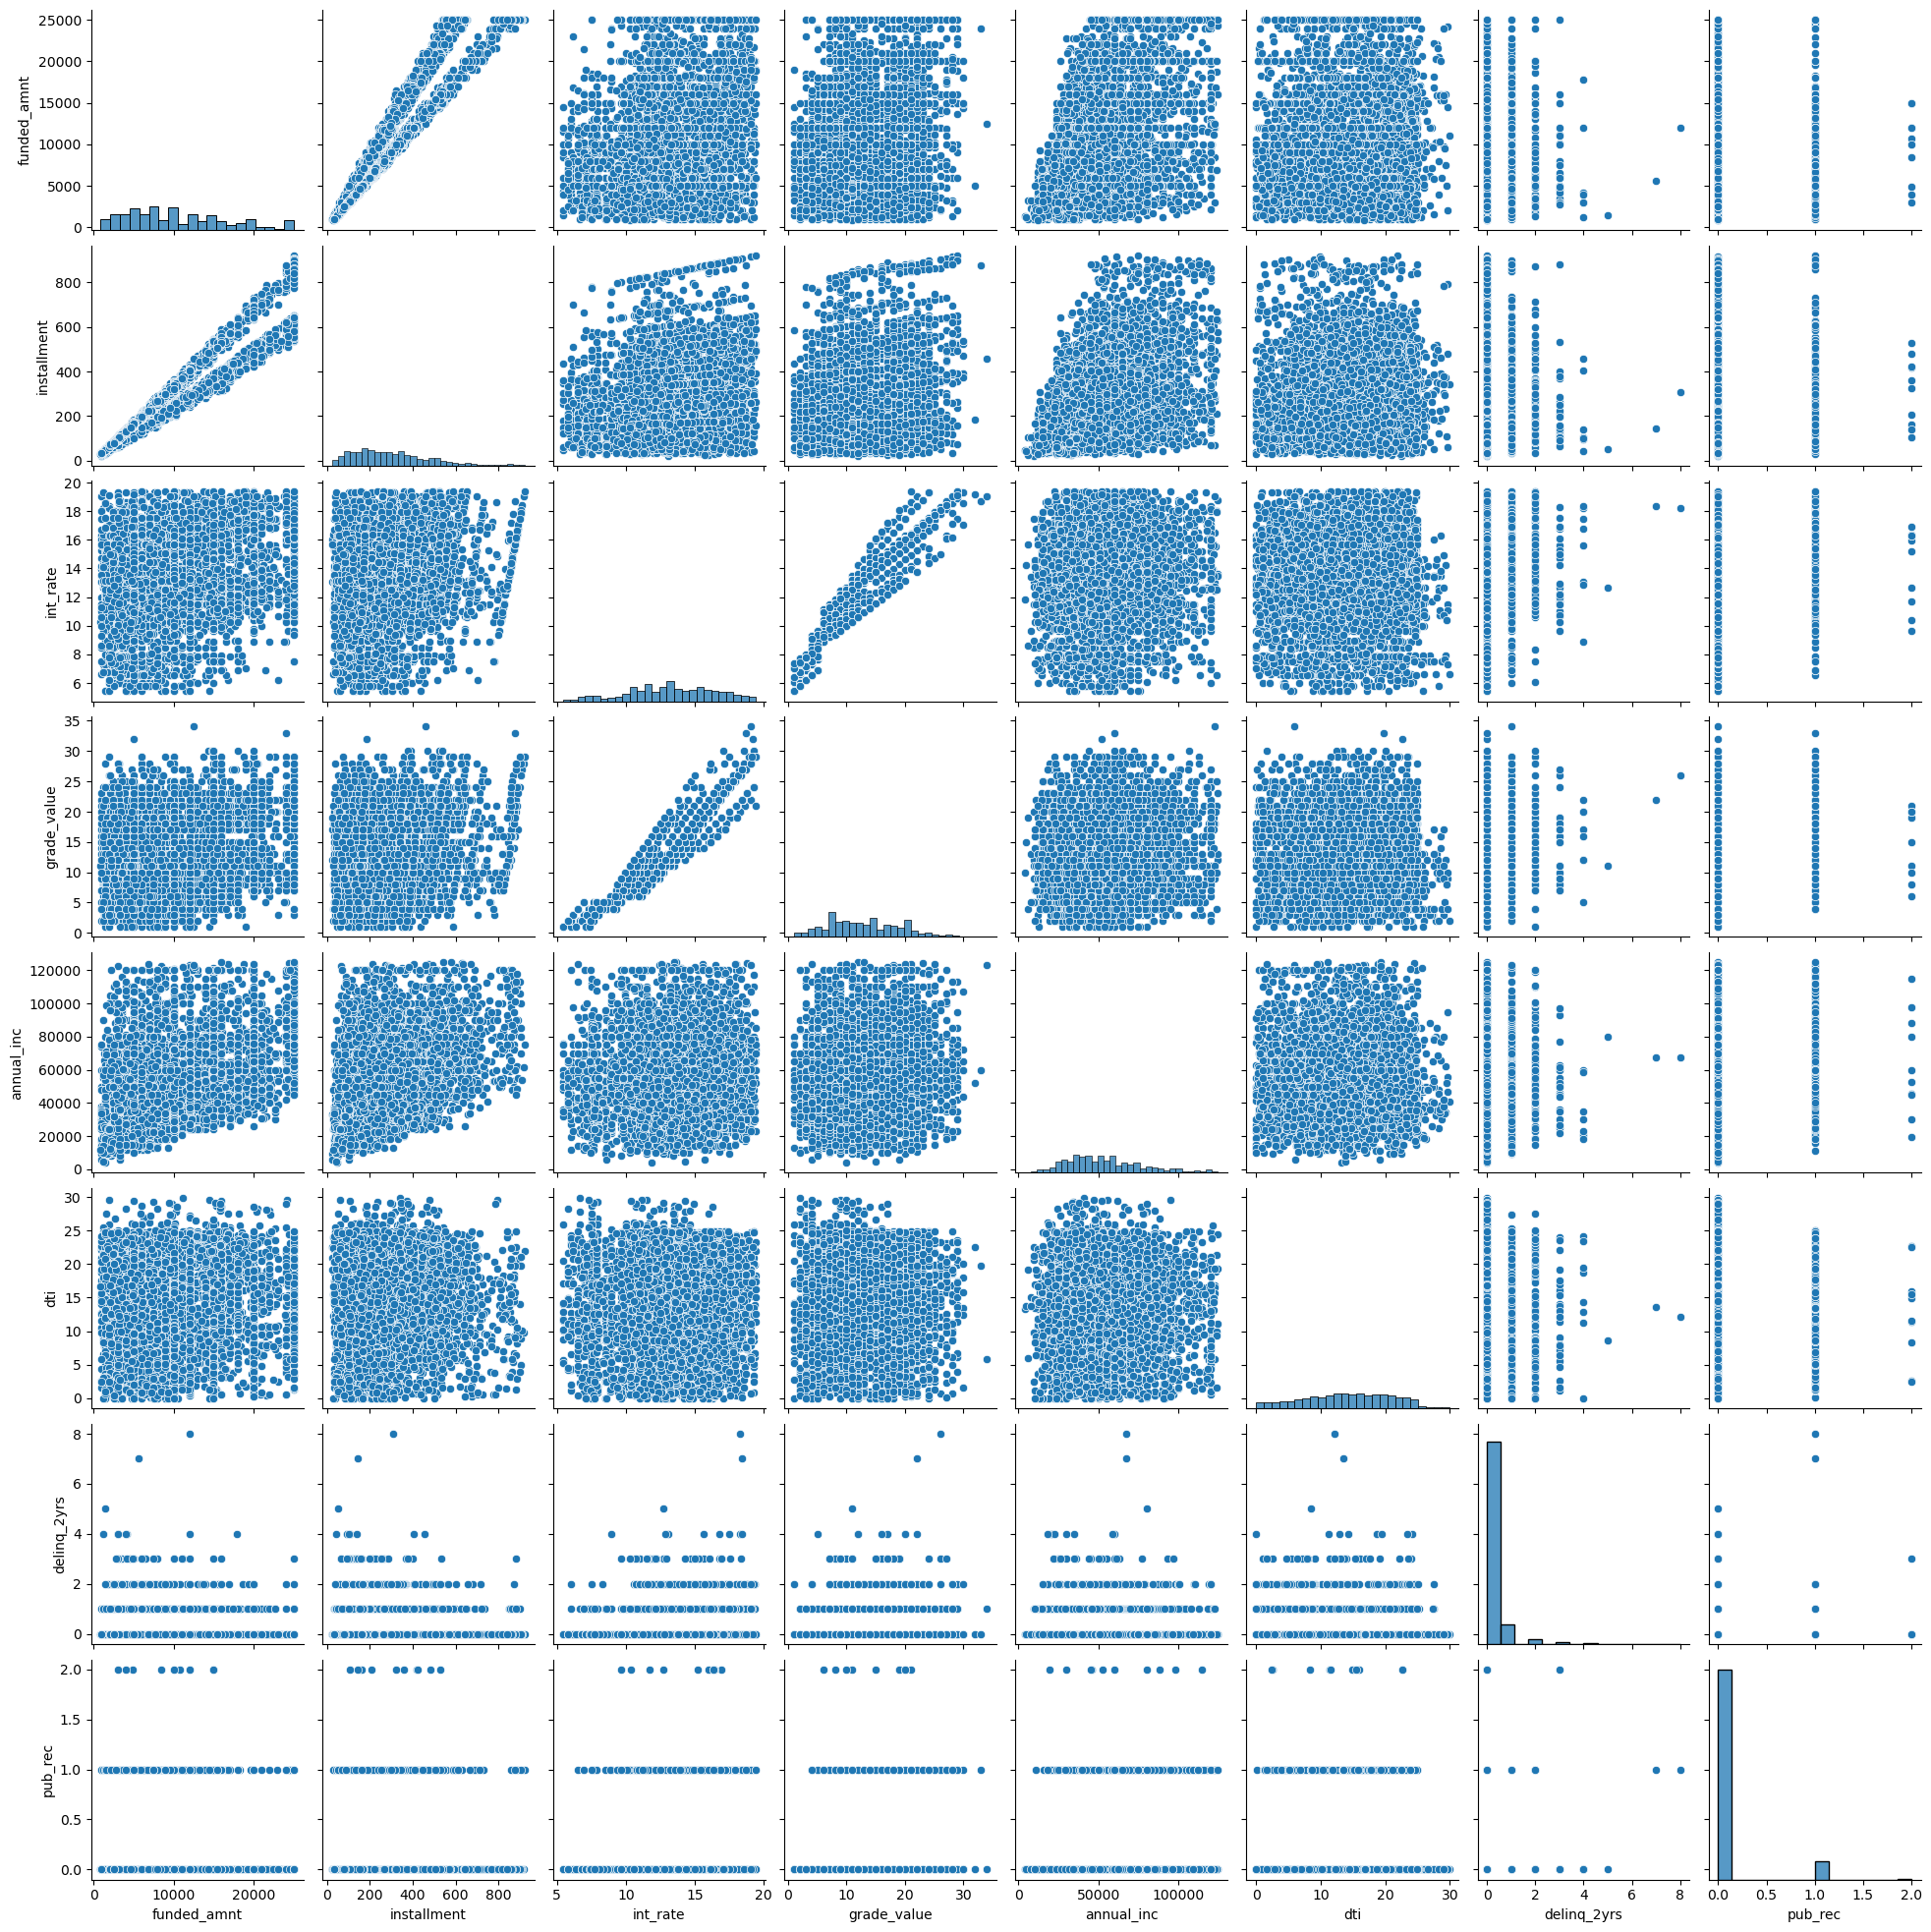

In [107]:
# Pairplot of numerical variables for defaulters
sns.pairplot(def_corr_df)
plt.show()

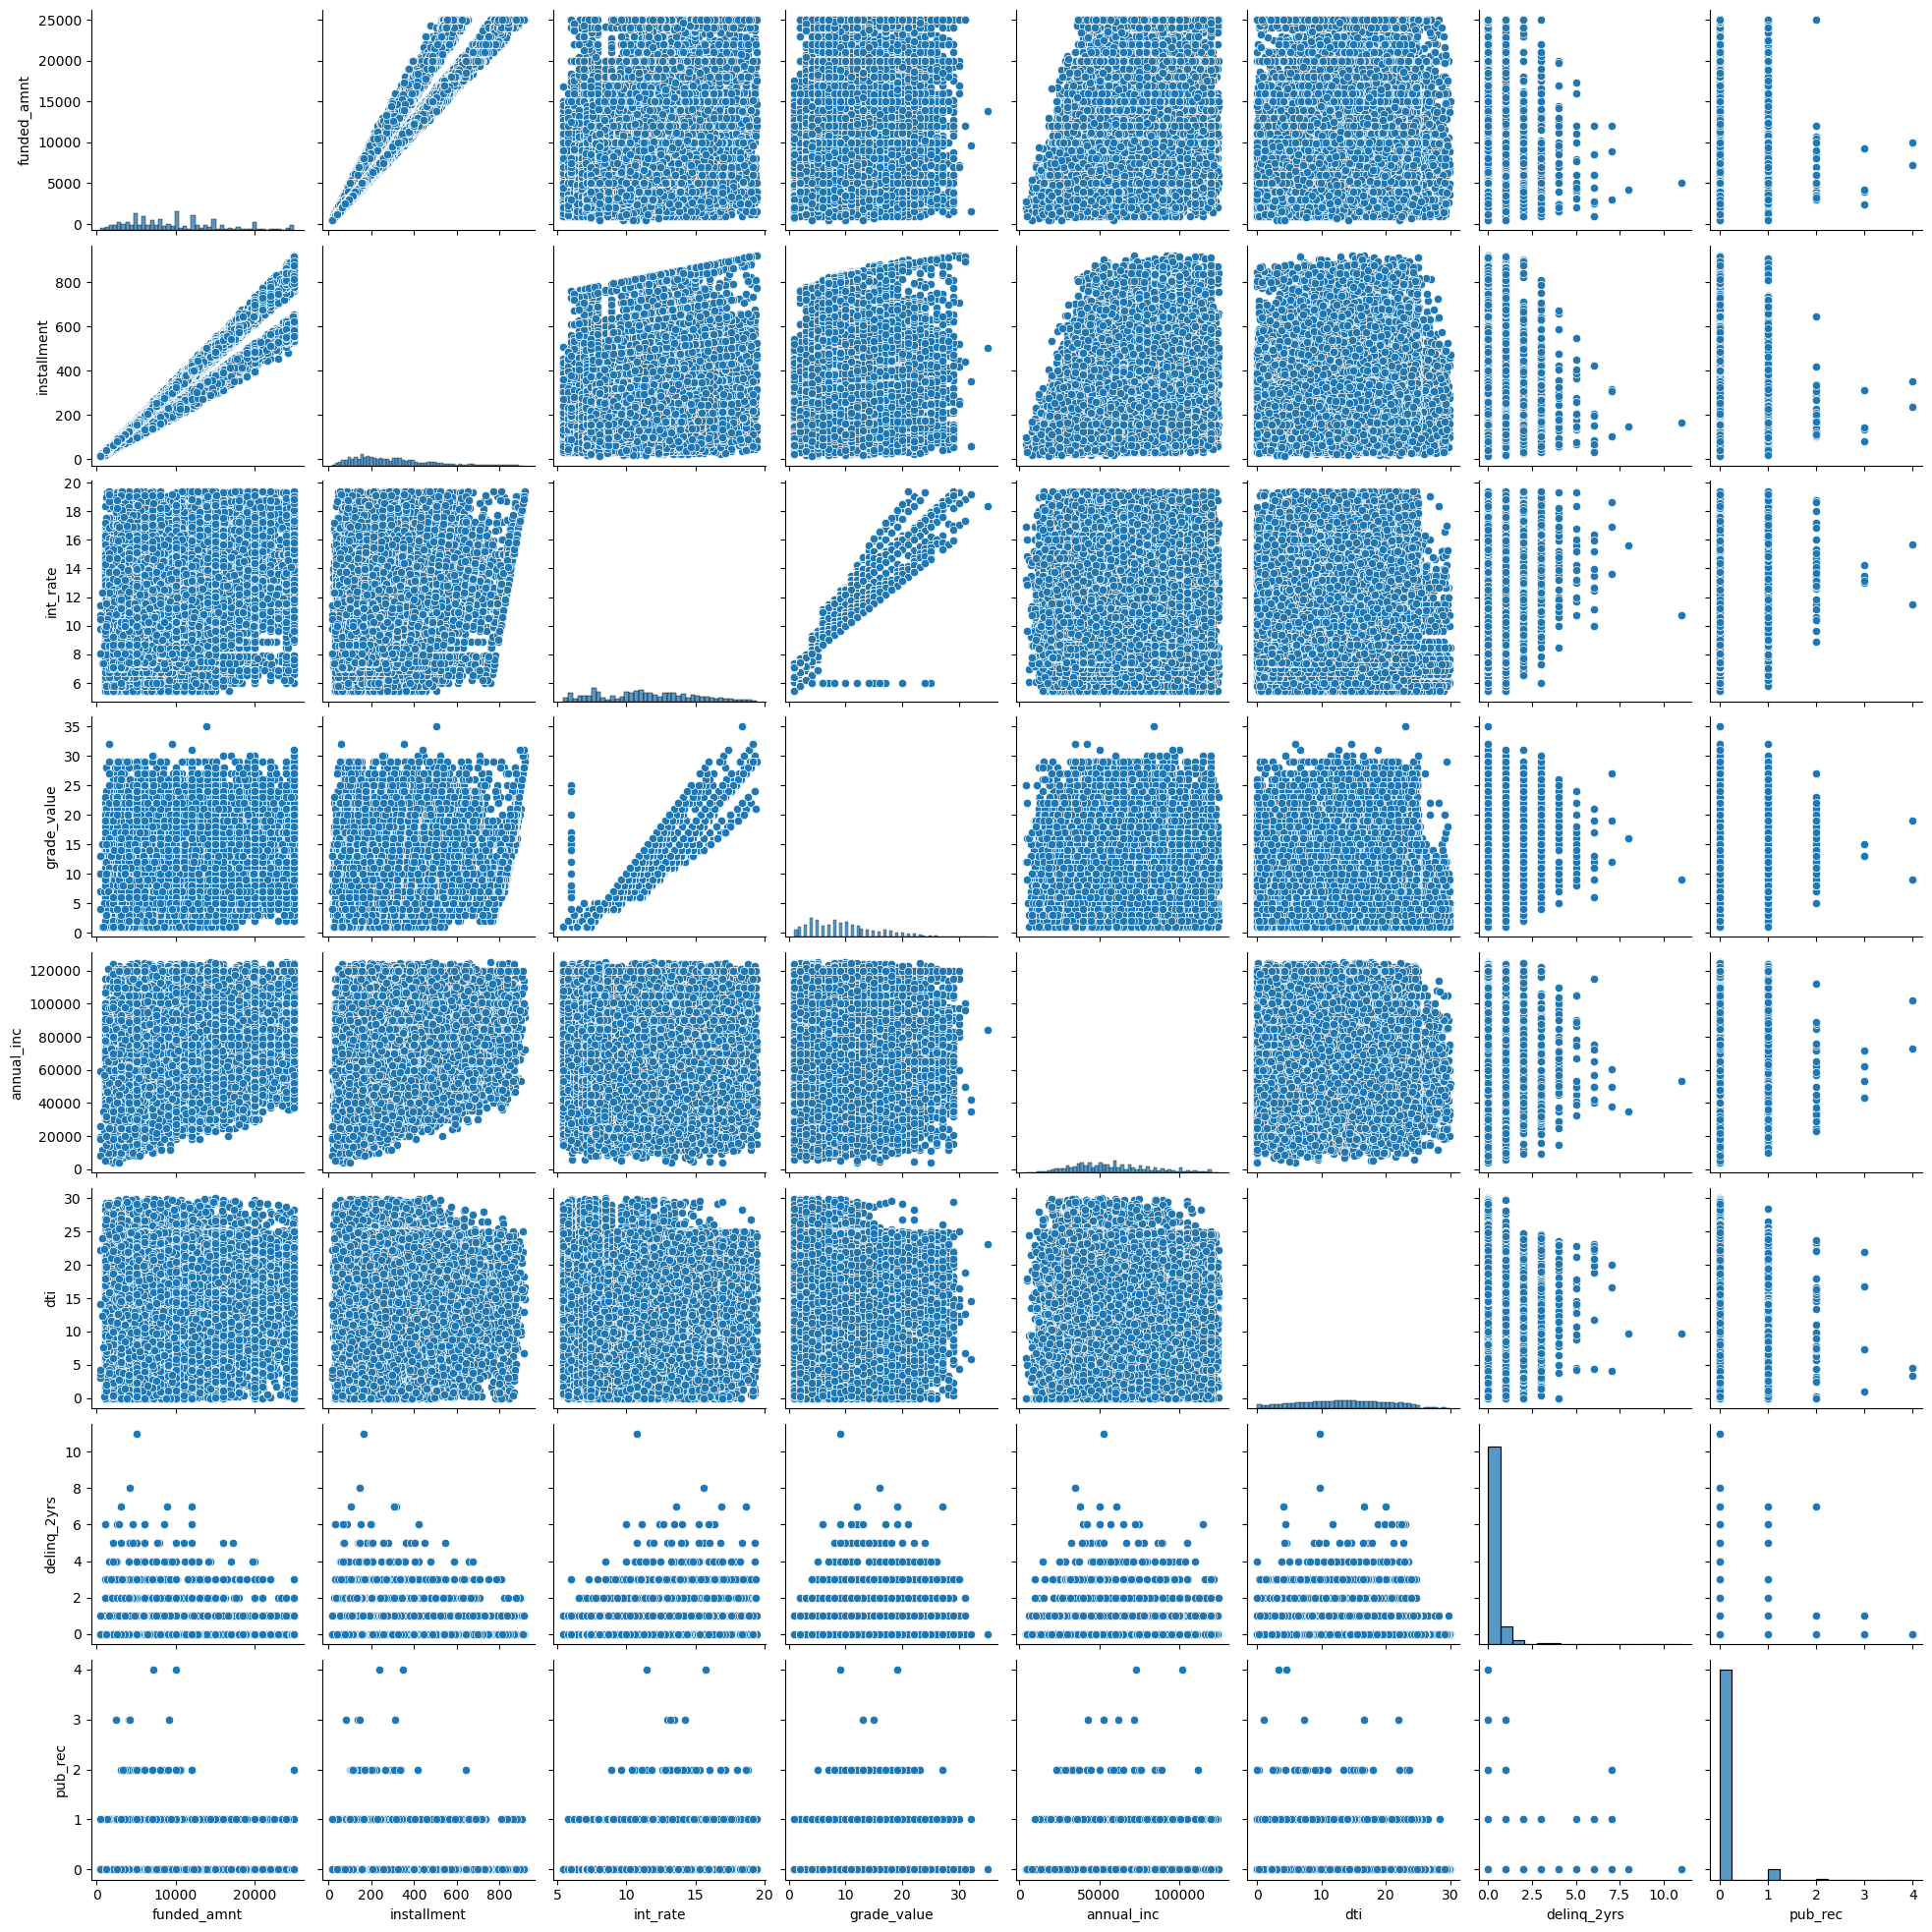

In [108]:
# Pairplot of numerical variables for non-defaulters
sns.pairplot(nondef_corr_df)
plt.show()

#### From the above pair-plots for defaulters and non-defaulters, it seems that they are pretty much similar irrespective of defaulting on payments.
Lets verify the same with correlation matrices and heatmaps.

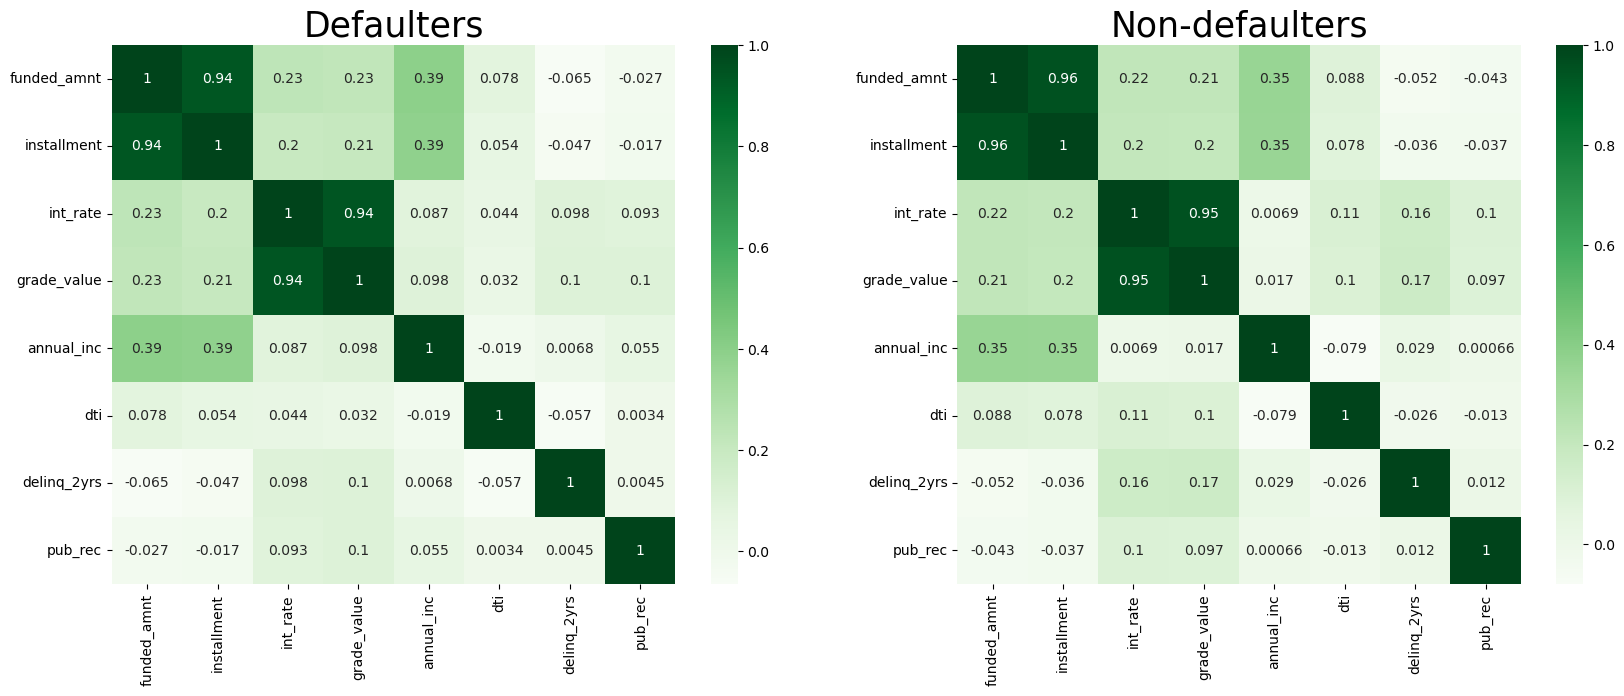

In [109]:
# Get correlation matrix
def_corr_df.corr()
nondef_corr_df.corr()

# Increase figure size
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
plt.title("Defaulters", fontsize=25)
sns.heatmap(def_corr_df.corr(), cmap="Greens", annot=True)

plt.subplot(1, 2, 2)
plt.title("Non-defaulters", fontsize=25)
sns.heatmap(nondef_corr_df.corr(), cmap="Greens", annot=True)

plt.show()

### Insight:
- From the heatmaps and pairplots, it is clear that funded_amnt and installments are directly correlated.
- Similarly interest rate and grades are positively correlated.
- There is a positive correlation, albeit weak, between funded amount and annual income.
- Number of derogatory public records (pub_rec) has very little effect on funded amount or delinquency in past 2 years.

---
# Conclusion

As per the above analysis, there are 5 variables that define defaulter behaviour.

1. __dti__:
    - The average dti for defaulters is higher than non-defaulters across all purposes, except wedding and medical and across all home ownership types. 
    - If the dti of an applicant is greater than the average dti for non-defaulters for a certain category, the applicant is more likely to default on the loan.
    - Similarly, if the dti of an applicant is greater than average dti for a non-defaulter for any type of home ownership, the applicant is more likely to default on the loan.

2. __Loan Amount__: 
    - Across all purposes (except house, moving and renewable_enery), the average loan amount is larger for defaulters compared to non-defaulters.
    - If the loan amount of an applicant is larger than average loan amount of non-defaulters for most of the purposes, the applicant is more likely to default on the loan.

3. __Annual Income__: 
    - The average annual income of defaulters is lower than that of non-defaulters across different grades. 
    - People with annual income lower than the average annual income of non-defaulters are more likely to default.

4. __Grade__: 
    - With poorer grades, interest rates increase. With increase in interest rates, the number of defaulters also increase.
    - People with poorer grades are more likely to default.

5. __Interest Rate__: 
    - With increase in interest rates, the number of defaulters also increase.
    - People with higher interest rates are more likely to default compared to those with lower interest rates.